# Day 1: Stationarity and Unit Root Tests
## Week 3: Time Series Analysis for Finance

---

**Learning Objectives:**
- Understand stationarity and why it matters
- Apply ADF, KPSS, and Phillips-Perron tests
- Transform non-stationary data
- Identify I(0) vs I(1) processes

In [1]:
#pip install statsmodels

In [2]:
# Day 1 Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')

# Load market data
df = pd.read_csv('../datasets/raw_data/combined_adjusted_close.csv', 
                 index_col='Date', parse_dates=True)
prices = df[['AAPL', 'MSFT', 'SPY', 'JPM']].dropna()
returns = prices.pct_change().dropna()
log_returns = np.log(prices / prices.shift(1)).dropna()

print("=" * 60)
print("STATIONARITY AND UNIT ROOT TESTS - DAY 1")
print("=" * 60)

STATIONARITY AND UNIT ROOT TESTS - DAY 1


## 1. What is Stationarity?

**Weak (Covariance) Stationarity** requires:
1. Constant mean: E[Xₜ] = μ for all t
2. Constant variance: Var(Xₜ) = σ² for all t
3. Autocovariance depends only on lag: Cov(Xₜ, Xₜ₊ₖ) = γₖ

**Why it matters:**
- Most statistical models assume stationarity
- Non-stationary data → spurious regressions
- Prices are non-stationary; returns are (usually) stationary

VISUAL: STATIONARY vs NON-STATIONARY


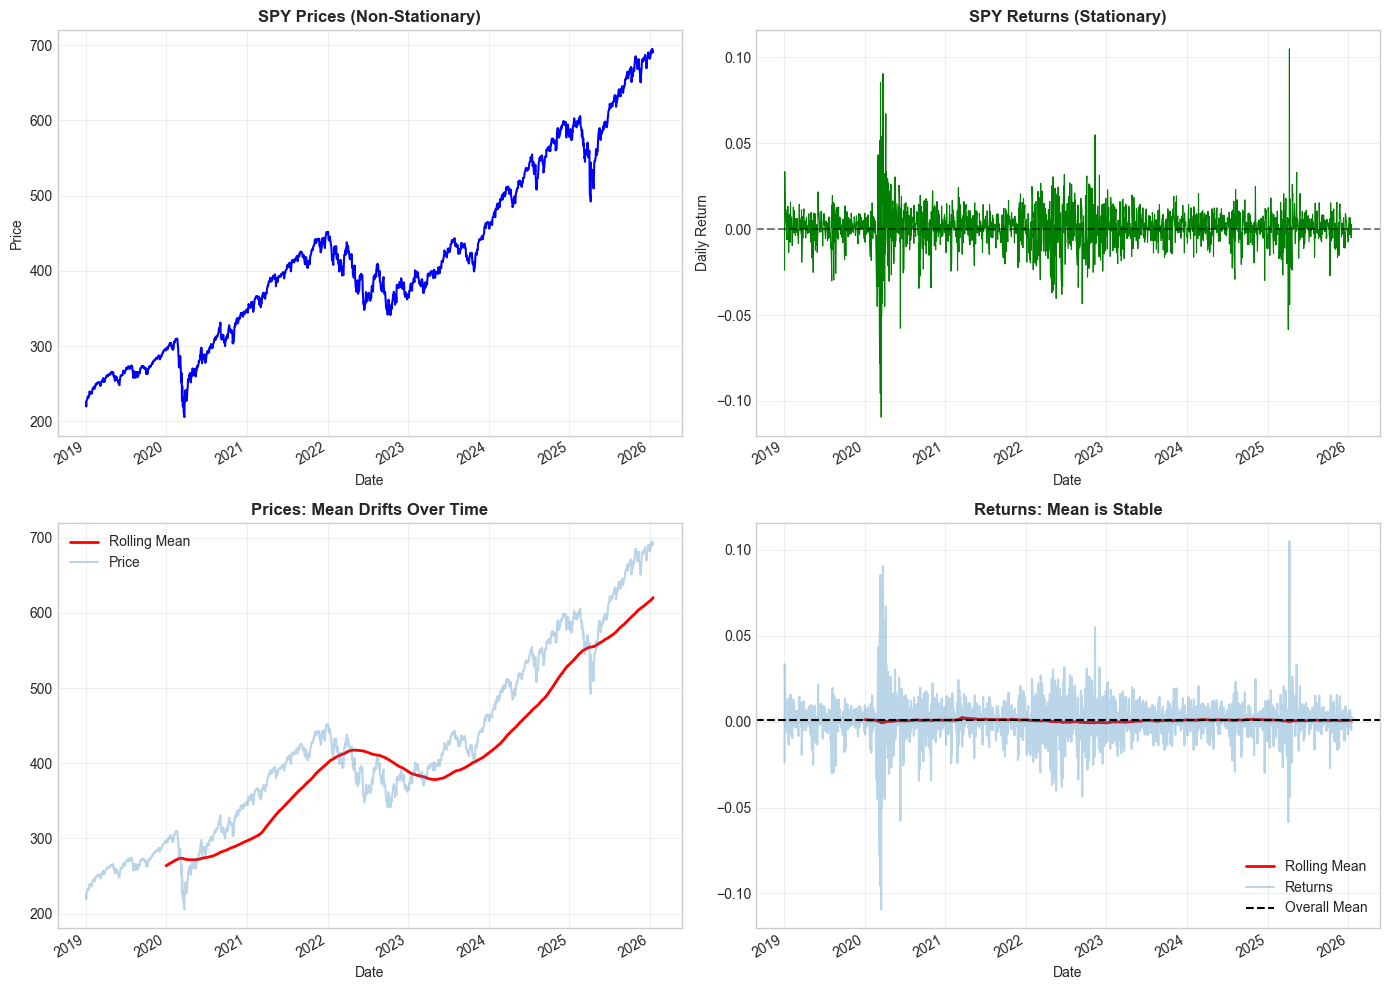

In [3]:
# Visual comparison: Prices vs Returns
print("=" * 60)
print("VISUAL: STATIONARY vs NON-STATIONARY")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Prices (non-stationary)
prices['SPY'].plot(ax=axes[0,0], color='blue', lw=1.5)
axes[0,0].set_title('SPY Prices (Non-Stationary)', fontsize=12, fontweight='bold')
axes[0,0].set_ylabel('Price')
axes[0,0].grid(True, alpha=0.3)

# Returns (stationary)
returns['SPY'].plot(ax=axes[0,1], color='green', lw=0.8)
axes[0,1].axhline(0, color='black', linestyle='--', alpha=0.5)
axes[0,1].set_title('SPY Returns (Stationary)', fontsize=12, fontweight='bold')
axes[0,1].set_ylabel('Daily Return')
axes[0,1].grid(True, alpha=0.3)

# Rolling mean comparison
window = 252
prices['SPY'].rolling(window).mean().plot(ax=axes[1,0], label='Rolling Mean', color='red', lw=2)
prices['SPY'].plot(ax=axes[1,0], alpha=0.3, label='Price')
axes[1,0].set_title('Prices: Mean Drifts Over Time', fontsize=12, fontweight='bold')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

returns['SPY'].rolling(window).mean().plot(ax=axes[1,1], label='Rolling Mean', color='red', lw=2)
returns['SPY'].plot(ax=axes[1,1], alpha=0.3, label='Returns')
axes[1,1].axhline(returns['SPY'].mean(), color='black', linestyle='--', label='Overall Mean')
axes[1,1].set_title('Returns: Mean is Stable', fontsize=12, fontweight='bold')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 2. Unit Root Tests

### Augmented Dickey-Fuller (ADF) Test
- H₀: Series has a unit root (non-stationary)
- H₁: Series is stationary
- Reject H₀ if p-value < 0.05

### KPSS Test
- H₀: Series is stationary
- H₁: Series has a unit root
- Reject H₀ if p-value < 0.05

In [4]:
# Unit Root Tests
print("=" * 60)
print("UNIT ROOT TESTS")
print("=" * 60)

def stationarity_tests(series, name):
    """Run ADF and KPSS tests and report results."""
    print(f"\n{'='*50}")
    print(f"Testing: {name}")
    print(f"{'='*50}")
    
    # ADF Test
    adf_result = adfuller(series.dropna(), autolag='AIC')
    adf_stat, adf_p = adf_result[0], adf_result[1]
    
    print(f"\nADF Test (H0: Non-stationary):")
    print(f"  Test Statistic: {adf_stat:.4f}")
    print(f"  p-value:        {adf_p:.6f}")
    print(f"  Critical Values: 1%: {adf_result[4]['1%']:.3f}, 5%: {adf_result[4]['5%']:.3f}")
    print(f"  Conclusion:     {'STATIONARY ✓' if adf_p < 0.05 else 'NON-STATIONARY ✗'}")
    
    # KPSS Test
    kpss_result = kpss(series.dropna(), regression='c', nlags='auto')
    kpss_stat, kpss_p = kpss_result[0], kpss_result[1]
    
    print(f"\nKPSS Test (H0: Stationary):")
    print(f"  Test Statistic: {kpss_stat:.4f}")
    print(f"  p-value:        {kpss_p:.4f}")
    print(f"  Conclusion:     {'STATIONARY ✓' if kpss_p > 0.05 else 'NON-STATIONARY ✗'}")
    
    # Combined interpretation
    if adf_p < 0.05 and kpss_p > 0.05:
        verdict = "STATIONARY (both tests agree)"
    elif adf_p >= 0.05 and kpss_p <= 0.05:
        verdict = "NON-STATIONARY (both tests agree)"
    else:
        verdict = "INCONCLUSIVE (tests disagree)"
    
    print(f"\n  VERDICT: {verdict}")
    return adf_p, kpss_p

# Test prices and returns
stationarity_tests(prices['SPY'], 'SPY Prices')
stationarity_tests(returns['SPY'], 'SPY Returns')
stationarity_tests(log_returns['SPY'], 'SPY Log Returns')

UNIT ROOT TESTS

Testing: SPY Prices

ADF Test (H0: Non-stationary):
  Test Statistic: 0.2555
  p-value:        0.975210
  Critical Values: 1%: -3.434, 5%: -2.863
  Conclusion:     NON-STATIONARY ✗

KPSS Test (H0: Stationary):
  Test Statistic: 5.8266
  p-value:        0.0100
  Conclusion:     NON-STATIONARY ✗

  VERDICT: NON-STATIONARY (both tests agree)

Testing: SPY Returns

ADF Test (H0: Non-stationary):
  Test Statistic: -13.2520
  p-value:        0.000000
  Critical Values: 1%: -3.434, 5%: -2.863
  Conclusion:     STATIONARY ✓

KPSS Test (H0: Stationary):
  Test Statistic: 0.0495
  p-value:        0.1000
  Conclusion:     STATIONARY ✓

  VERDICT: STATIONARY (both tests agree)

Testing: SPY Log Returns

ADF Test (H0: Non-stationary):
  Test Statistic: -13.1015
  p-value:        0.000000
  Critical Values: 1%: -3.434, 5%: -2.863
  Conclusion:     STATIONARY ✓

KPSS Test (H0: Stationary):
  Test Statistic: 0.0445
  p-value:        0.1000
  Conclusion:     STATIONARY ✓

  VERDICT: ST

(np.float64(1.7059605687146367e-24), np.float64(0.1))

## 3. Transforming Non-Stationary Data

TRANSFORMATIONS FOR STATIONARITY

ADF Test Results for Various Transformations:
--------------------------------------------------
Transformation            ADF Stat     p-value      Stationary?
--------------------------------------------------
Original (Price)          0.2555       0.975210     ✗ No
First Difference          -14.0228     0.000000     ✓ Yes
Log Transform             -0.8393      0.807315     ✗ No
Log Returns               -13.1015     0.000000     ✓ Yes
Second Difference         -13.7703     0.000000     ✓ Yes


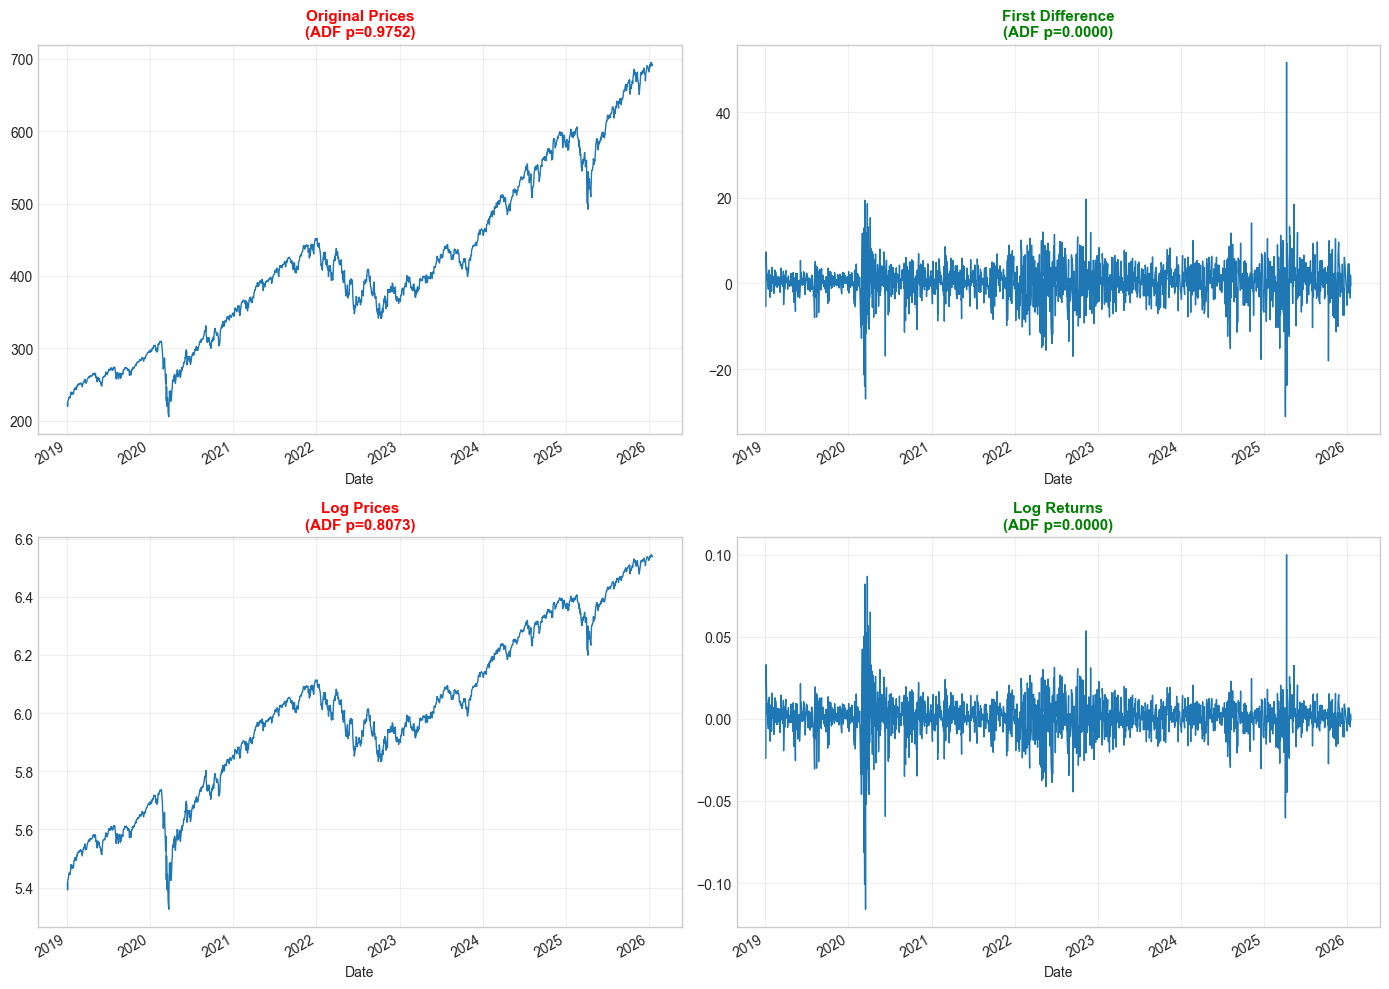

In [5]:
# Transformations to achieve stationarity
print("=" * 60)
print("TRANSFORMATIONS FOR STATIONARITY")
print("=" * 60)

spy_price = prices['SPY']

# Different transformations
transformations = {
    'Original (Price)': spy_price,
    'First Difference': spy_price.diff().dropna(),
    'Log Transform': np.log(spy_price),
    'Log Returns': np.log(spy_price / spy_price.shift(1)).dropna(),
    'Second Difference': spy_price.diff().diff().dropna()
}

print("\nADF Test Results for Various Transformations:")
print("-" * 50)
print(f"{'Transformation':<25} {'ADF Stat':<12} {'p-value':<12} {'Stationary?'}")
print("-" * 50)

for name, series in transformations.items():
    adf_stat, adf_p, _, _, crit, _ = adfuller(series.dropna(), autolag='AIC')
    stationary = '✓ Yes' if adf_p < 0.05 else '✗ No'
    print(f"{name:<25} {adf_stat:<12.4f} {adf_p:<12.6f} {stationary}")

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

transformations_viz = {
    'Original Prices': spy_price,
    'First Difference': spy_price.diff().dropna(),
    'Log Prices': np.log(spy_price),
    'Log Returns': np.log(spy_price / spy_price.shift(1)).dropna()
}

for ax, (name, series) in zip(axes.flatten(), transformations_viz.items()):
    series.plot(ax=ax, lw=1)
    adf_p = adfuller(series.dropna())[1]
    color = 'green' if adf_p < 0.05 else 'red'
    ax.set_title(f"{name}\n(ADF p={adf_p:.4f})", fontsize=11, fontweight='bold', color=color)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. I(0) vs I(1) Processes

- **I(0)**: Stationary - no differencing needed
- **I(1)**: Need one difference to become stationary
- **I(2)**: Need two differences (rare in finance)

In [6]:
# Determine integration order
print("=" * 60)
print("INTEGRATION ORDER: I(d)")
print("=" * 60)

def find_integration_order(series, max_d=3):
    """Find the integration order d such that series is I(d)."""
    current = series.dropna()
    for d in range(max_d + 1):
        adf_p = adfuller(current.dropna())[1]
        if adf_p < 0.05:
            return d
        current = current.diff().dropna()
    return max_d

print("\nIntegration Order for Various Series:")
print("-" * 40)

test_series = {
    'SPY Price': prices['SPY'],
    'SPY Returns': returns['SPY'],
    'AAPL Price': prices['AAPL'],
    'AAPL Returns': returns['AAPL'],
    'Log(SPY)': np.log(prices['SPY'])
}

for name, series in test_series.items():
    d = find_integration_order(series)
    print(f"{name:<20}: I({d})")

print("\n💡 Key Insight:")
print("   - Prices are I(1) → Need one difference")
print("   - Returns are I(0) → Already stationary")
print("   - Always work with returns for modeling!")

INTEGRATION ORDER: I(d)

Integration Order for Various Series:
----------------------------------------
SPY Price           : I(1)
SPY Returns         : I(0)
AAPL Price          : I(1)
AAPL Returns        : I(0)
Log(SPY)            : I(1)

💡 Key Insight:
   - Prices are I(1) → Need one difference
   - Returns are I(0) → Already stationary
   - Always work with returns for modeling!


In [7]:
# Compare all assets
print("=" * 60)
print("STATIONARITY ACROSS ASSETS")
print("=" * 60)

assets = ['AAPL', 'MSFT', 'SPY', 'JPM']

results = []
for asset in assets:
    price_adf = adfuller(prices[asset].dropna())[1]
    return_adf = adfuller(returns[asset].dropna())[1]
    
    results.append({
        'Asset': asset,
        'Price ADF p-value': price_adf,
        'Price Stationary': 'Yes' if price_adf < 0.05 else 'No',
        'Return ADF p-value': return_adf,
        'Return Stationary': 'Yes' if return_adf < 0.05 else 'No'
    })

results_df = pd.DataFrame(results)
print("\n" + results_df.to_string(index=False))

print("\n✅ Conclusion: Prices are NON-stationary, Returns ARE stationary")

STATIONARITY ACROSS ASSETS

Asset  Price ADF p-value Price Stationary  Return ADF p-value Return Stationary
 AAPL           0.742624               No        1.320042e-25               Yes
 MSFT           0.733449               No        1.496109e-25               Yes
  SPY           0.975210               No        8.739169e-25               Yes
  JPM           0.992060               No        4.003545e-23               Yes

✅ Conclusion: Prices are NON-stationary, Returns ARE stationary


## 📝 Key Takeaways - Day 1

### Stationarity:
- Most time series models require stationarity
- Prices are typically I(1), returns are I(0)
- Always check before modeling!

### Unit Root Tests:
| Test | H₀ | Reject if... |
|------|----|--------------|
| ADF | Non-stationary | p < 0.05 |
| KPSS | Stationary | p < 0.05 |

### Transformations:
- First difference: Xₜ - Xₜ₋₁
- Log returns: ln(Pₜ/Pₜ₋₁)
- Both make prices stationary

### Interview Questions:
- "Why can't you use prices directly in regression?"
- "What's the difference between ADF and KPSS tests?"
- "What does I(1) mean?"